In [1]:
import numpy as np 
import matplotlib.pylab as plt
from getdist import plots, MCSamples
import getdist
import pandas as pd
import os
import glob
import sys
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib import cm

# our script
import utils.helpers as hp
import utils.statistics as us

fontSize = 20

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})

settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3}
np.set_printoptions(precision=3)

In [2]:
PATH = '/home/harry/Desktop/MontePython-V3.4/chains/'

In [12]:
mean_colors = cm.tab10.colors[0:5]
random_colors = cm.tab10.colors[0:5]

In [13]:
def load_data(folder: str) -> np.ndarray:
    """
    omega_cdm
    ln10^{10}A_s
    omega_b
    n_s
    h
    A_IA
    c_min
    dc
    Ac
    Omega_m
    sigma8
    """
    
    # the full path to the file 
    loc = PATH + folder + '/'
    all_files = os.listdir(PATH + folder)
    
    # we grab all the files which contain the samples 
    files = np.array(all_files)[['__' in f for f in all_files]]
    
    # empty list to record the samples 
    samples = []
    
    for file in files:
        
        samples.append(np.loadtxt(loc + file))
        
    samples = np.concatenate(samples)
    nsamples = samples.shape[0]
    
    # compute S_8 
    S8 = samples[:,-1] * np.sqrt(samples[:,-2] / 0.3)
    S8 = S8.reshape(nsamples, 1) 
    Om = samples[:,-2].reshape(nsamples, 1)
    
    S8_Om = np.concatenate([Om, S8], axis = 1)
    
    return samples, S8_Om

### KV-450 Samples

In [25]:
# number of dimensions for plotting
ndim = 2

# some names for the parameters
names = ["x%s"%i for i in range(ndim)]
labels = [r'$\Omega_{\textrm{m}}$', r'$S_{8}$']

alpha = 0.7

In [26]:
Nset = 4
# we are using sets [2, 3, 4, 5] hence, i+2
mean = {'M'+ str(i+2): load_data('KV-450-Bayes-Mean-Set-'+str(i+2)) for i in range(Nset)}
random = {'R'+ str(i+2): load_data('KV-450-Bayes-Random-Set-'+str(i+2)) for i in range(Nset)}

In [28]:
mean_combined = load_data('KV-450-Bayes-Mean-Set-7')
random_combined = load_data('KV-450-Bayes-Random-Set-7-Long-Chain')

### Combine MCMC samples

Here we combine the MCMC samples for $\Omega_{\textrm{m}}$ and $S_{8}$.

In [29]:
om_4_mean_sets = np.concatenate([mean['M'+str(i+2)][1][:,0] for i in range(Nset)])
s8_4_mean_sets = np.concatenate([mean['M'+str(i+2)][1][:,1] for i in range(Nset)])
om_s8_mean = np.array([om_4_mean_sets, s8_4_mean_sets]).T

In [30]:
us.summary(om_s8_mean, labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.309 ± (0.093, 0.098)
$S_{8}$                                  :  0.743 ± (0.037, 0.039)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.309 ± (0.093, 0.097)
$S_{8}$                                  :  0.743 ± (0.038, 0.038)


In [31]:
om_4_random_sets = np.concatenate([random['R'+str(i+2)][1][:,0] for i in range(Nset)])
s8_4_random_sets = np.concatenate([random['R'+str(i+2)][1][:,1] for i in range(Nset)])
om_s8_random = np.array([om_4_random_sets, s8_4_random_sets]).T

In [32]:
us.summary(om_s8_random, labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.305 ± (0.095, 0.098)
$S_{8}$                                  :  0.743 ± (0.037, 0.039)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.306 ± (0.095, 0.099)
$S_{8}$                                  :  0.742 ± (0.038, 0.038)


# Long Chain With Index of $n(z)$

Here, we run a long chain of MCMC $(8 \times 50 000)$ and we record the index of the $n(z)$ samples. We then split the chain into the different sets of $n(z)$, that is, indices 
- $0 \leq i \leq 999$ corresponds to $n(z)$ Set 2 
- $1000 \leq i \leq 1999$ corresponds to $n(z)$ Set 3
- $2000 \leq i \leq 2999$ corresponds to $n(z)$ Set 4 
- $3000 \leq i \leq 3999$ corresponds to $n(z)$ Set 5 

In [33]:
long_chain = pd.read_csv('process-bootstrap/all_samples.csv').iloc[:,2:]
set_2 = pd.read_csv('process-bootstrap/set_2.csv').iloc[:,2:]
set_3 = pd.read_csv('process-bootstrap/set_3.csv').iloc[:,2:]
set_4 = pd.read_csv('process-bootstrap/set_4.csv').iloc[:,2:]
set_5 = pd.read_csv('process-bootstrap/set_5.csv').iloc[:,2:]

In [34]:
long_chain.head()

,Index,N,-logL,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
0,1576,8.0,92.0302,0.104772,3.194745,0.020231,0.985119,0.736800,-0.416036,2.160961,0.000032,0.982002,0.231446,0.834792
1,2319,22.0,92.0172,0.104772,3.194745,0.020231,0.985119,0.736800,-0.416036,2.247339,0.000131,0.949030,0.231446,0.834792
2,2096,3.0,92.5661,0.115218,3.072968,0.022354,0.899156,0.738405,-0.570743,2.317373,0.000149,0.940206,0.253494,0.795397
3,1815,1.0,91.9540,0.115218,3.072968,0.022354,0.899156,0.738405,-0.570743,2.427934,0.000048,0.956667,0.253494,0.795397
4,705,1.0,91.9510,0.115218,3.072968,0.022354,0.899156,0.738405,-0.570743,2.918948,0.000227,1.070397,0.253494,0.795397


In [35]:
set_2.shape

(28035, 14)

In [36]:
set_3.shape

(23104, 14)

In [37]:
set_4.shape

(27490, 14)

In [38]:
set_5.shape

(22762, 14)

In [39]:
def extract_parameters(file: pd.DataFrame):
    
    samples = file[['p'+str(i+1) for i in range(11)]].values
    nsamples = samples.shape[0]
    
    # compute S_8 
    S8 = samples[:,-1] * np.sqrt(samples[:,-2] / 0.3)
    S8 = S8.reshape(nsamples, 1) 
    Om = samples[:,-2].reshape(nsamples, 1)
    
    S8_Om = np.concatenate([Om, S8], axis = 1)
    
    return samples, S8_Om


In [40]:
# subset_samples_2, s8_om_2 = extract_parameters(set_2)
subset_samples_2, s8_om_2 = load_data('KV-450-Bayes-Random-Set-8')
subset_samples_3, s8_om_3 = extract_parameters(set_3)
subset_samples_4, s8_om_4 = extract_parameters(set_4)
subset_samples_5, s8_om_5 = extract_parameters(set_5)

long_samples, s8_om_long = extract_parameters(long_chain)

In [41]:
us.summary(s8_om_long, labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.304 ± (0.099, 0.102)
$S_{8}$                                  :  0.756 ± (0.039, 0.039)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.305 ± (0.097, 0.103)
$S_{8}$                                  :  0.756 ± (0.039, 0.039)


In [42]:
us.summary(s8_om_2, labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.301 ± (0.104, 0.101)
$S_{8}$                                  :  0.772 ± (0.038, 0.040)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.304 ± (0.101, 0.104)
$S_{8}$                                  :  0.771 ± (0.039, 0.039)


In [43]:
us.summary(s8_om_3, labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.304 ± (0.099, 0.102)
$S_{8}$                                  :  0.756 ± (0.040, 0.039)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.305 ± (0.097, 0.104)
$S_{8}$                                  :  0.756 ± (0.040, 0.039)


In [44]:
us.summary(s8_om_4, labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.304 ± (0.098, 0.103)
$S_{8}$                                  :  0.756 ± (0.039, 0.040)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.305 ± (0.097, 0.104)
$S_{8}$                                  :  0.756 ± (0.039, 0.039)


In [45]:
us.summary(s8_om_5, labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.304 ± (0.099, 0.102)
$S_{8}$                                  :  0.756 ± (0.039, 0.040)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.305 ± (0.098, 0.104)
$S_{8}$                                  :  0.756 ± (0.039, 0.040)


### Planck Samples

In [46]:
folder = '/home/harry/Desktop/Planck/base/plikHM_TTTEEE_lowl_lowE/'

c1 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_1.txt')
c2 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_2.txt')
c3 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_3.txt')
c4 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_4.txt')

s1 = np.array([c1[:,31], c1[:,36]]).T
s2 = np.array([c2[:,31], c2[:,36]]).T
s3 = np.array([c3[:,31], c3[:,36]]).T
s4 = np.array([c4[:,31], c4[:,36]]).T

samples_planck = np.concatenate([s1, s2, s3, s4])

In [47]:
planck_plot = MCSamples(samples=samples_planck,names = names, labels = labels, settings = settings)
mean_combined_plot = MCSamples(samples=mean_combined[1],names = names, labels = labels, settings = settings, label = r'Mean - 4000 $n(z)$')
random_combined_plot = MCSamples(samples=random_combined[1],names = names, labels = labels, settings = settings, label = r'Random - 4000 $n(z)$ - Long MCMC Chain')

Removed no burn in
Removed no burn in
Removed no burn in


In [48]:
label_mean = ['Set ' + str(i+2) +' - Mean' for i in range(Nset)]
label_random = ['Set ' + str(i+3) +' - Random' for i in range(Nset)]
labels_5000 = [r'Mean - 4000 $n(z)$', r'Random - 4000 $n(z)$']

In [49]:
us.summary(mean_combined[1], labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.310 ± (0.095, 0.099)
$S_{8}$                                  :  0.757 ± (0.040, 0.041)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.311 ± (0.094, 0.100)
$S_{8}$                                  :  0.757 ± (0.040, 0.040)


In [50]:
us.summary(random_combined[1], labels, 1)

Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.307 ± (0.098, 0.099)
$S_{8}$                                  :  0.757 ± (0.039, 0.040)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.307 ± (0.097, 0.099)
$S_{8}$                                  :  0.756 ± (0.039, 0.040)


In [51]:
for i in range(Nset):
    print('Set '+str(i+2))
    us.summary(random['R'+str(i+2)][1], labels, 1)
    print('*'*80)

Set 2
Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.309 ± (0.095, 0.099)
$S_{8}$                                  :  0.744 ± (0.036, 0.039)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.309 ± (0.095, 0.099)
$S_{8}$                                  :  0.743 ± (0.037, 0.038)
********************************************************************************
Set 3
Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.305 ± (0.094, 0.100)
$S_{8}$                                  :  0.743 ± (0.037, 0.039)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.305 ± (0.094, 0.100)
$S_{8}$                                  :  0.74

In [52]:
for i in range(Nset):
    print('Set '+str(i+2))
    us.summary(mean['M'+str(i+2)][1], labels, 1)
    print('*'*80)

Set 2
Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.310 ± (0.092, 0.097)
$S_{8}$                                  :  0.743 ± (0.036, 0.039)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.310 ± (0.092, 0.097)
$S_{8}$                                  :  0.742 ± (0.037, 0.038)
********************************************************************************
Set 3
Using the median
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.314 ± (0.091, 0.096)
$S_{8}$                                  :  0.745 ± (0.037, 0.039)

Using the mean
--------------------------------------------------------------------------------
$\Omega_{\textrm{m}}$                    :  0.313 ± (0.091, 0.096)
$S_{8}$                                  :  0.74

# $S_{8}\,-\,\Omega_{\textrm{m}}$ Triangle Plot

In [53]:
mean_triangle = []

for i in range(Nset):
    mean_plot = MCSamples(samples=mean['M'+str(i+2)][1],names = names, labels = labels, settings = settings, label = f'Mean Set {i+2}')
    mean_plot.updateSettings({'contours': [0.68, 0.95]})
    mean_triangle.append(mean_plot)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [60]:
random_triangle = []

random_index = [s8_om_2, s8_om_3, s8_om_4, s8_om_5]

for i in range(Nset):
    if i == 0:
        lab = f'Random Set 2 - Long MCMC Chain - Separate Run'
        
    else:
        lab = f'Random Set {i+2}'
    random_plot = MCSamples(samples=random_index[i],names = names, labels = labels, settings = settings, label = lab)
    random_plot.updateSettings({'contours': [0.68, 0.95]})
    random_triangle.append(random_plot)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


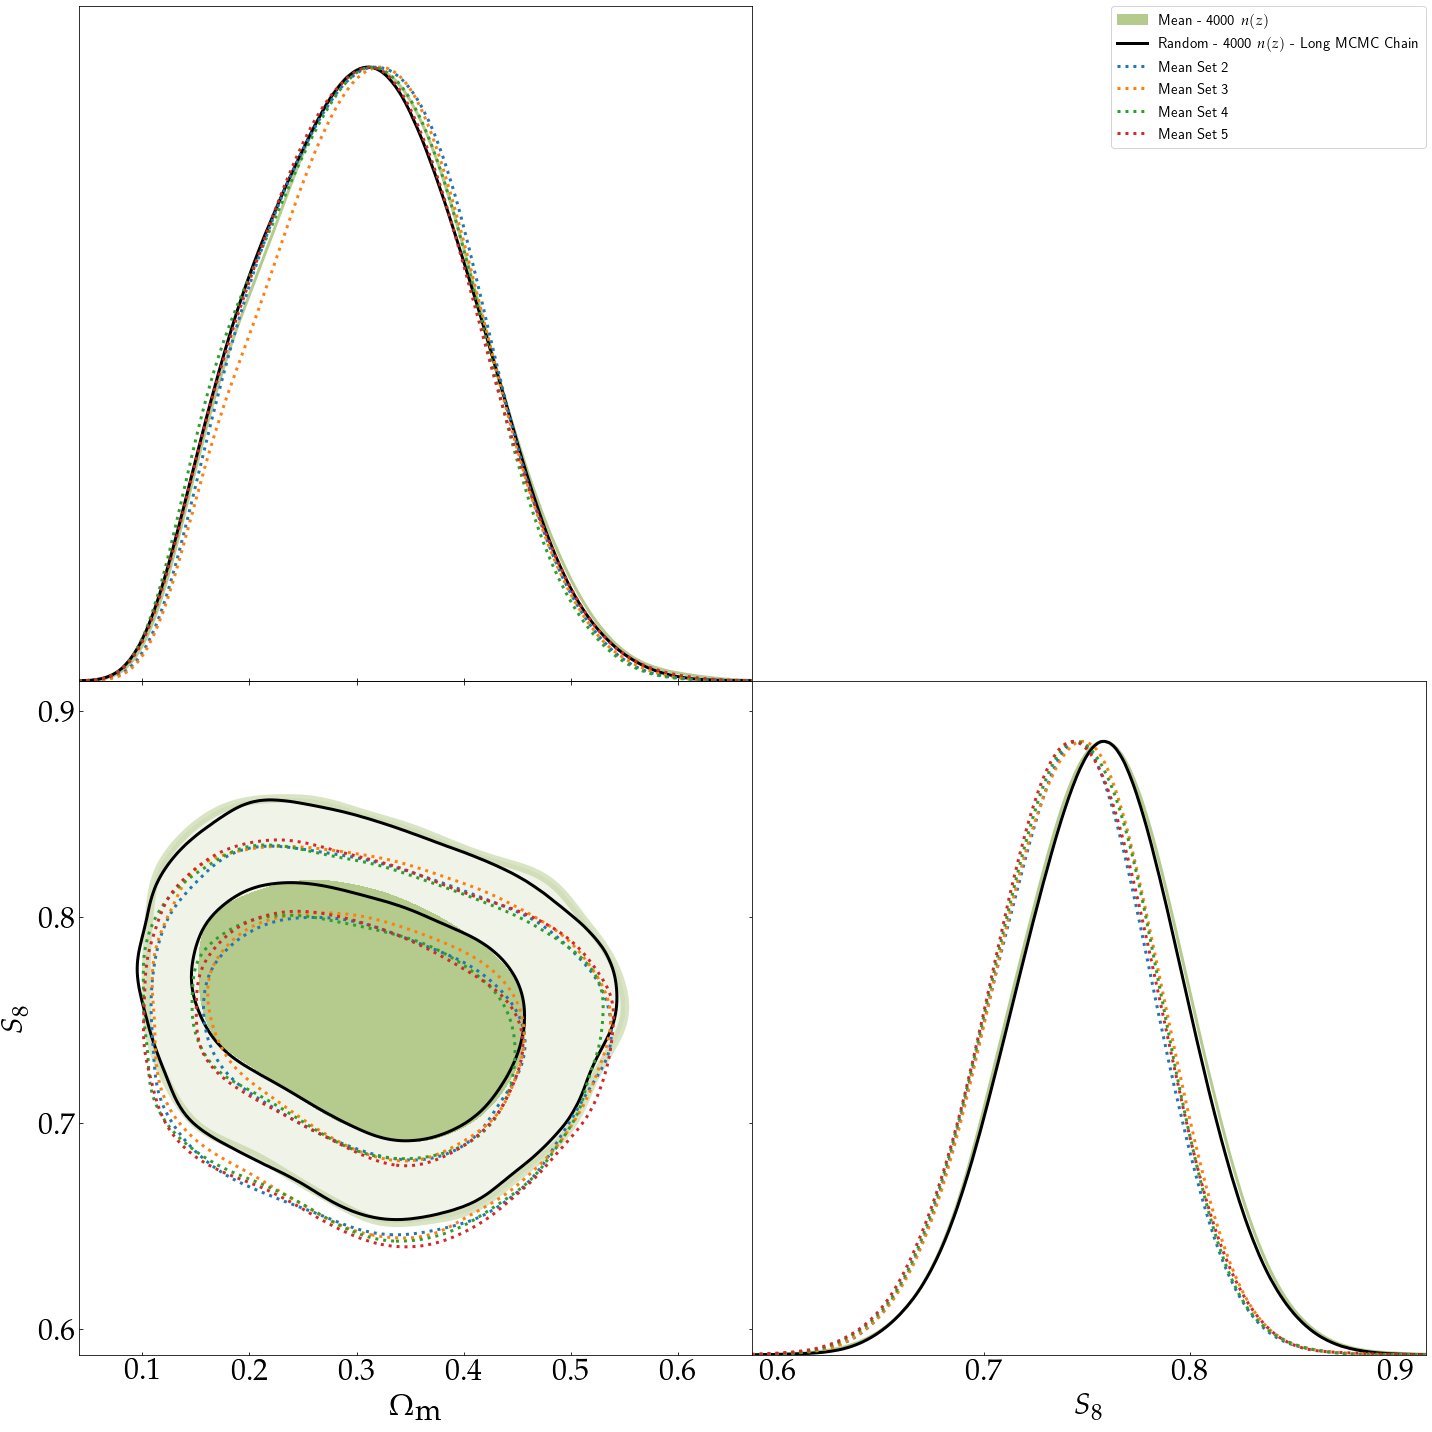

In [58]:
contours = np.array([0.68,0.95])

G = plots.getSubplotPlotter(subplot_size=10)
G.settings.solid_contour_palefactor = 0.8
G.settings.alpha_filled_add = alpha
G.settings.num_plot_contours = 2
G.settings.lw_contour = 3
G.settings.axes_fontsize = 30
G.settings.lab_fontsize = 30
G.settings.fontsize = 35 # important for padding in x-axis 
G.settings.legend_fontsize = 15
mean_combined_plot.updateSettings({'contours': [0.68, 0.95]})
random_combined_plot.updateSettings({'contours': [0.68, 0.95]})
G.triangle_plot([mean_combined_plot, random_combined_plot] + mean_triangle, filled = [True,False]+[False]*Nset, contour_colors=['#B5CA8D', 'k']+list(mean_colors), contour_lws=[3]*(Nset+2), contour_ls=['-', '-']+[':']*Nset)
# plt.savefig('plots/triangle_plot_mean_4_sets.pdf', transparent = False, bbox_inches = 'tight') 
plt.show()

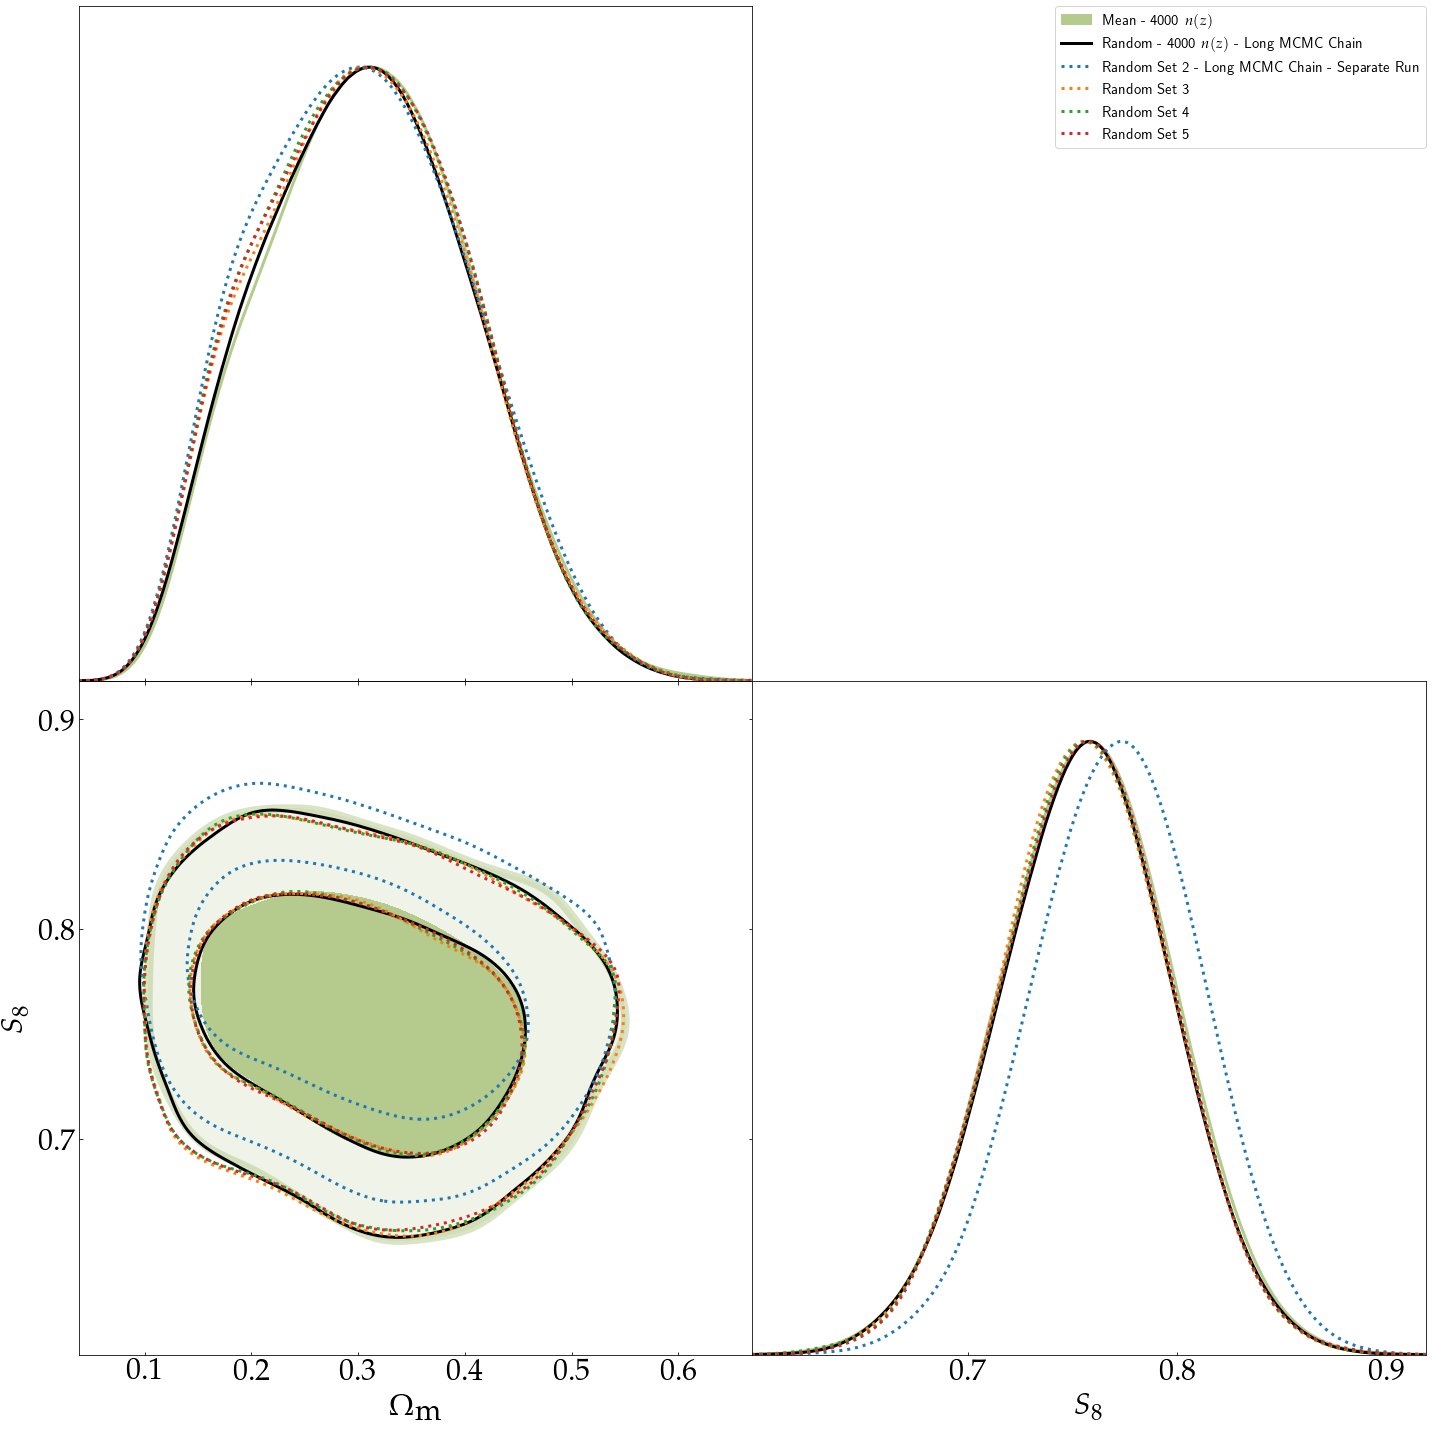

In [62]:
G = plots.getSubplotPlotter(subplot_size=10)
G.settings.solid_contour_palefactor = 0.8
G.settings.alpha_filled_add = alpha
G.settings.num_plot_contours = 2
G.settings.lw_contour = 3
G.settings.axes_fontsize = 30
G.settings.lab_fontsize = 30
G.settings.fontsize = 35 # important for padding in x-axis 
G.settings.legend_fontsize = 15
mean_combined_plot.updateSettings({'contours': [0.68, 0.95]})
random_combined_plot.updateSettings({'contours': [0.68, 0.95]})
G.triangle_plot([mean_combined_plot, random_combined_plot] + random_triangle, filled = [True,False]+[False]*Nset, contour_colors=['#B5CA8D', 'k']+list(mean_colors), contour_lws=[3]*(Nset+2), contour_ls=['-', '-']+[':']*Nset)
# plt.savefig('plots/triangle_plot_random_indexed_set_2_separate.pdf', transparent = False, bbox_inches = 'tight') 
plt.show()

# $S_{8}\,-\,\Omega_{\textrm{m}}$ Plot

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


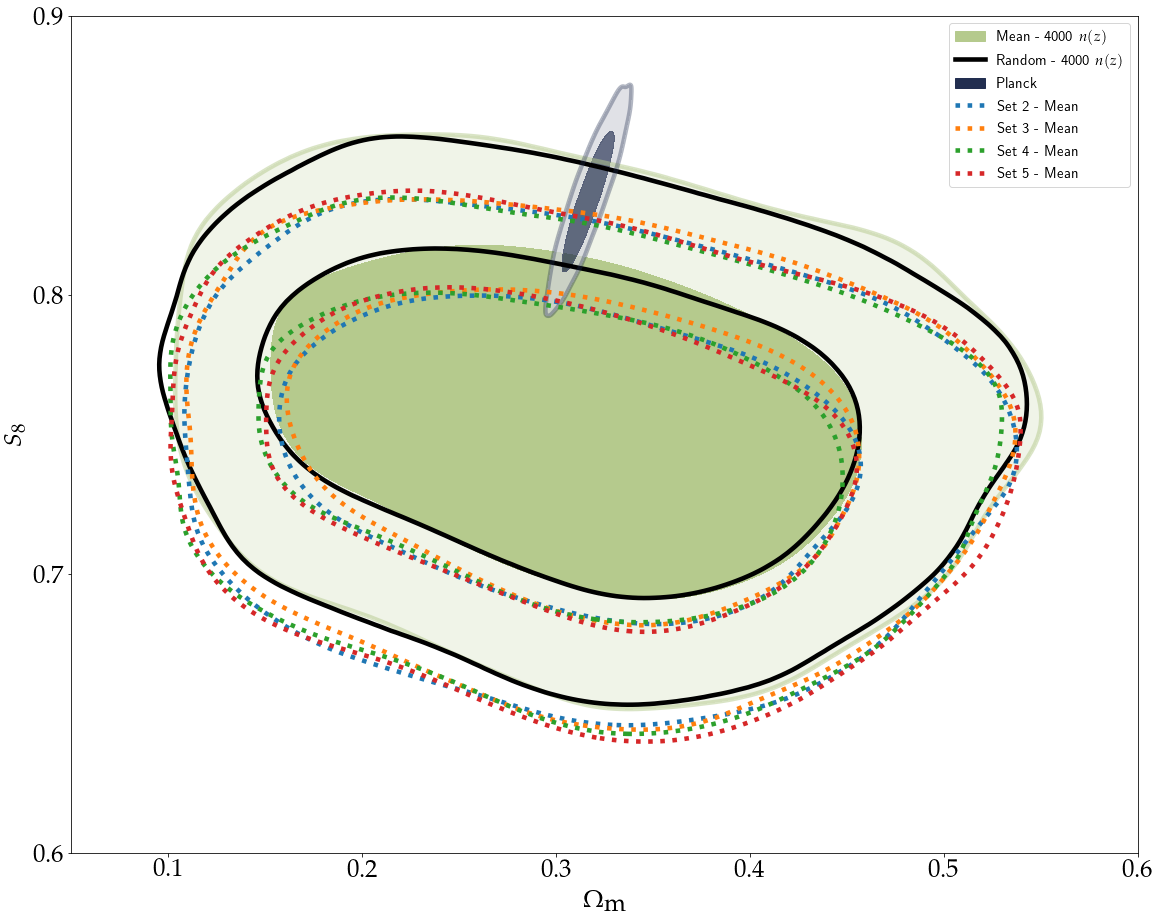

In [25]:
G = plots.getSinglePlotter(width_inch=16, ratio=4 / 5.)
G.settings.num_plot_contours = 2
G.settings.lw_contour = 1
G.settings.axes_fontsize = 25
G.settings.lab_fontsize = 25
G.settings.fontsize = 25 
G.settings.solid_contour_palefactor = 0.8
G.settings.alpha_filled_add = alpha
G.settings.legend_fontsize = 15

# plot for planck
planck_plot.updateSettings({'contours': [0.68, 0.95]})
mean_combined_plot.updateSettings({'contours': [0.68, 0.95]})
random_combined_plot.updateSettings({'contours': [0.68, 0.95]})

G.plot_2d([mean_combined_plot, random_combined_plot, planck_plot], 'x0', 'x1', filled=[True, False, True], colors=['#B5CA8D', 'k', '#222E50'])

labels_combined = [r'Mean - 4000 $n(z)$', r'Random - 4000 $n(z)$', 'Planck']

# plot for the mean 
for i in range(Nset):
    mean_plot = MCSamples(samples=mean['M'+str(i+2)][1],names = names, labels = labels, settings = settings)
    mean_plot.updateSettings({'contours': [0.68, 0.95]})
    G.plot_2d([mean_plot], 'x0', 'x1', filled=[False], colors=[mean_colors[i]], ls = [':'])

G.add_legend(labels_combined + label_mean, legend_loc='upper right');

plt.xlim(0.05, 0.60)
plt.ylim(0.60, 0.90)
# plt.savefig('plots/S8_Omega_Matter_Planck_mp_4_sets_mean.pdf', transparent = False, bbox_inches = 'tight') 
plt.show()

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


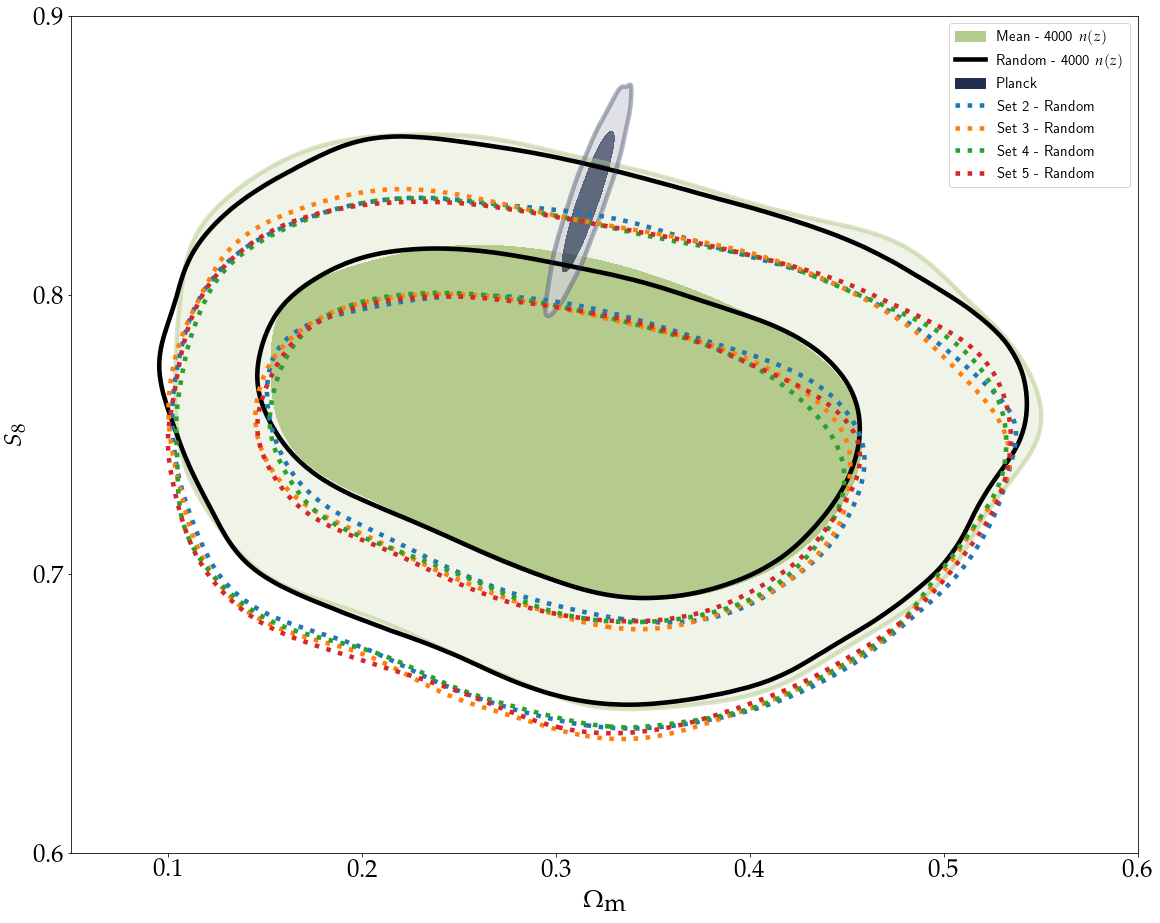

In [26]:
G = plots.getSinglePlotter(width_inch=16, ratio=4 / 5.)
G.settings.num_plot_contours = 2
G.settings.lw_contour = 1
G.settings.axes_fontsize = 25
G.settings.lab_fontsize = 25
G.settings.fontsize = 25 
G.settings.solid_contour_palefactor = 0.8
G.settings.alpha_filled_add = alpha
G.settings.legend_fontsize = 15

# plot for planck
planck_plot.updateSettings({'contours': [0.68, 0.95]})
mean_combined_plot.updateSettings({'contours': [0.68, 0.95]})
random_combined_plot.updateSettings({'contours': [0.68, 0.95]})

G.plot_2d([mean_combined_plot, random_combined_plot, planck_plot], 'x0', 'x1', filled=[True, False, True], colors=['#B5CA8D', 'k', '#222E50'])

labels_5000 = [r'Mean - 4000 $n(z)$', r'Random - 4000 $n(z)$', 'Planck']

# plot for samples of n(z)
for i in range(Nset):
    random_plot = MCSamples(samples=random['R'+str(i+2)][1],names = names, labels = labels, settings = settings)
    random_plot.updateSettings({'contours': [0.68, 0.95]})
    G.plot_2d([random_plot], 'x0', 'x1', filled=[False], colors=[random_colors[i]], ls = [':'])

G.add_legend(labels_combined + label_random, legend_loc='upper right');

plt.xlim(0.05, 0.60)
plt.ylim(0.60, 0.90)
# plt.savefig('plots/S8_Omega_Matter_Planck_mp_4_sets_random.pdf', transparent = False, bbox_inches = 'tight') 
plt.show()